In [ ]:
%config Completer.use_jedi = False

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Clustering

## K-Means Clustering

In [37]:
df = pd.read_csv('C:/Users/georg/Machine Learning/DATA/bank-full.csv')

In [38]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  subscribed  
0          93.994          -36.4      4.857       5191.0          no  
1          93.994          -36.4      4.857       5191.0          no  
2          93.994          -36.4      4.857       5191.0          no  
3          93.994          -36.4      4.857       5191.0          no  
4          93.994          -36.4      4.857       5191.0          no  

[5 rows x 21 columns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

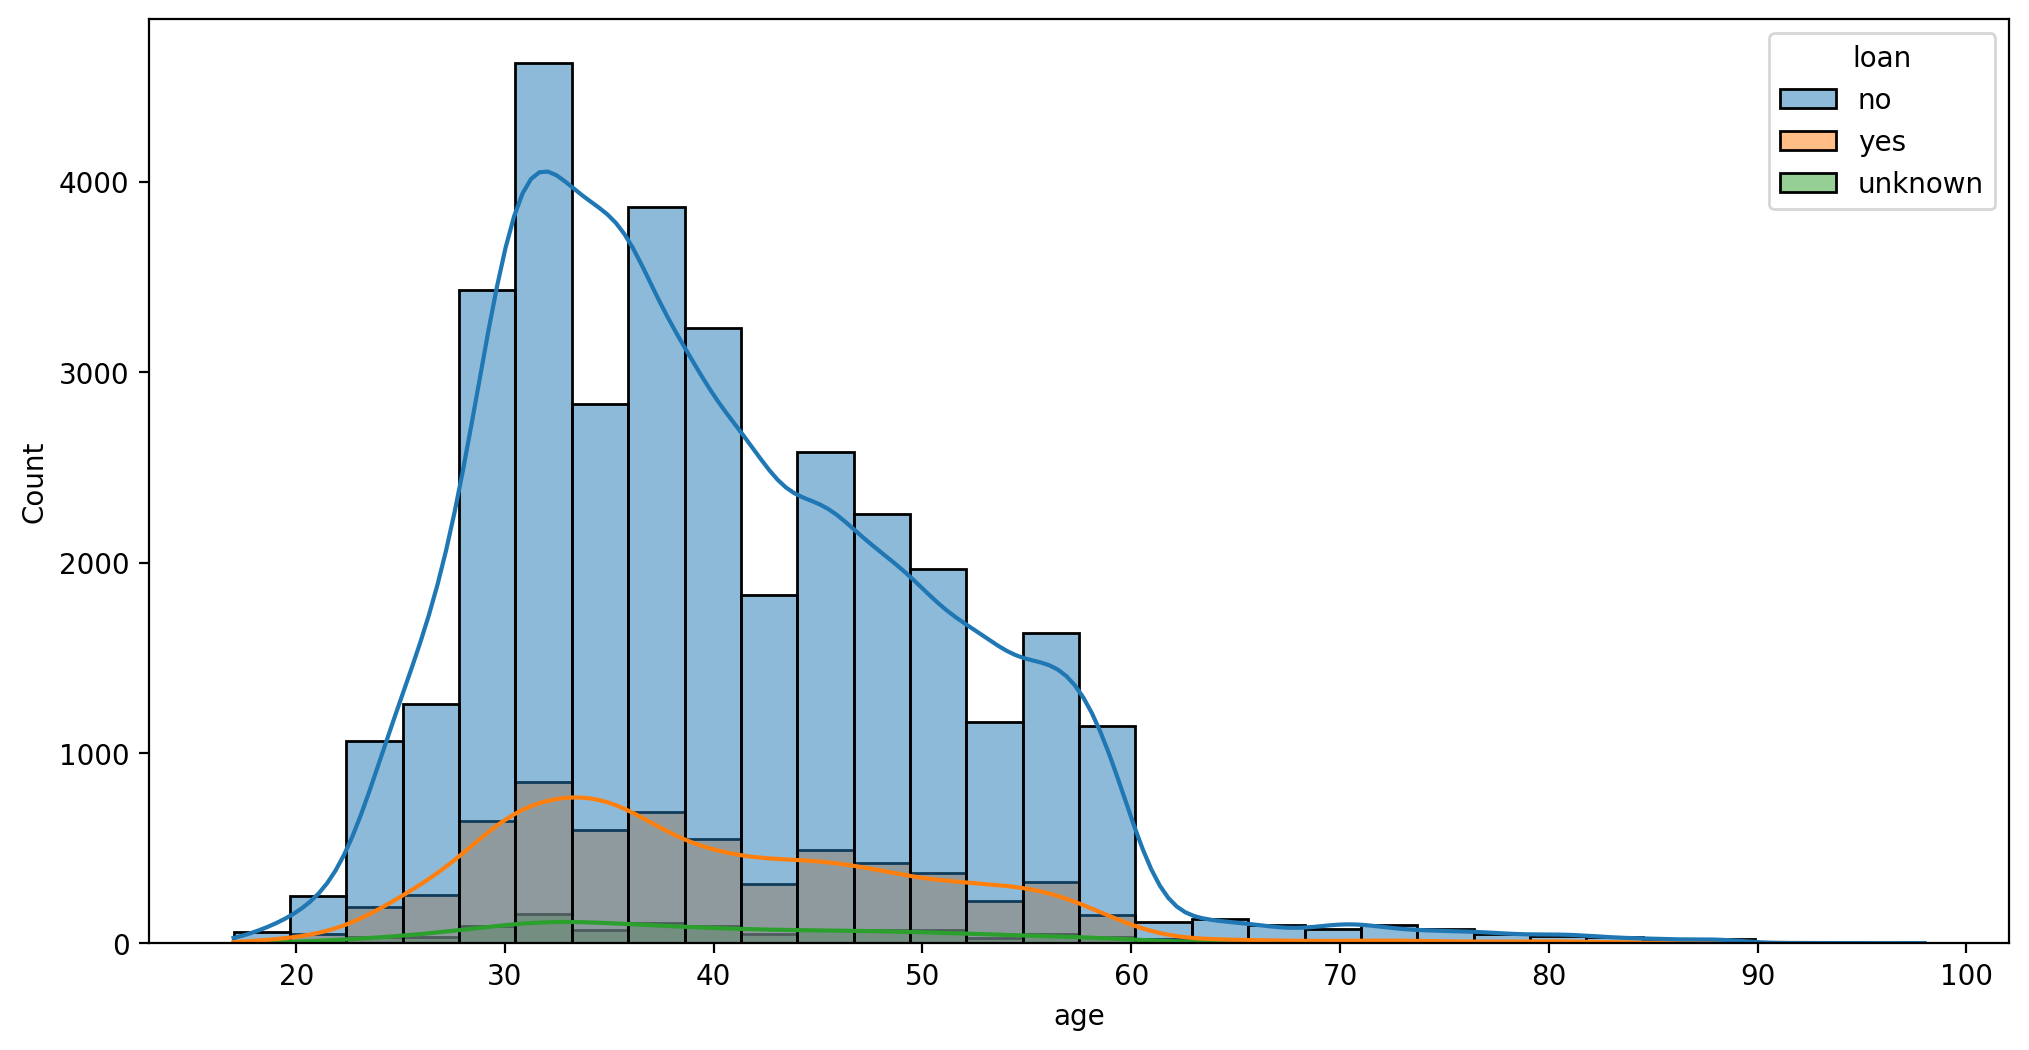

In [41]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='age', bins=30, kde=True, hue='loan');

<Axes: xlabel='loan', ylabel='count'>

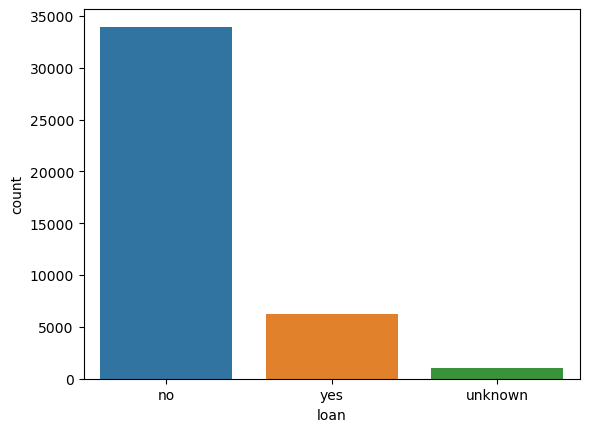

In [42]:
sns.countplot(data=df, x='loan')

In [43]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

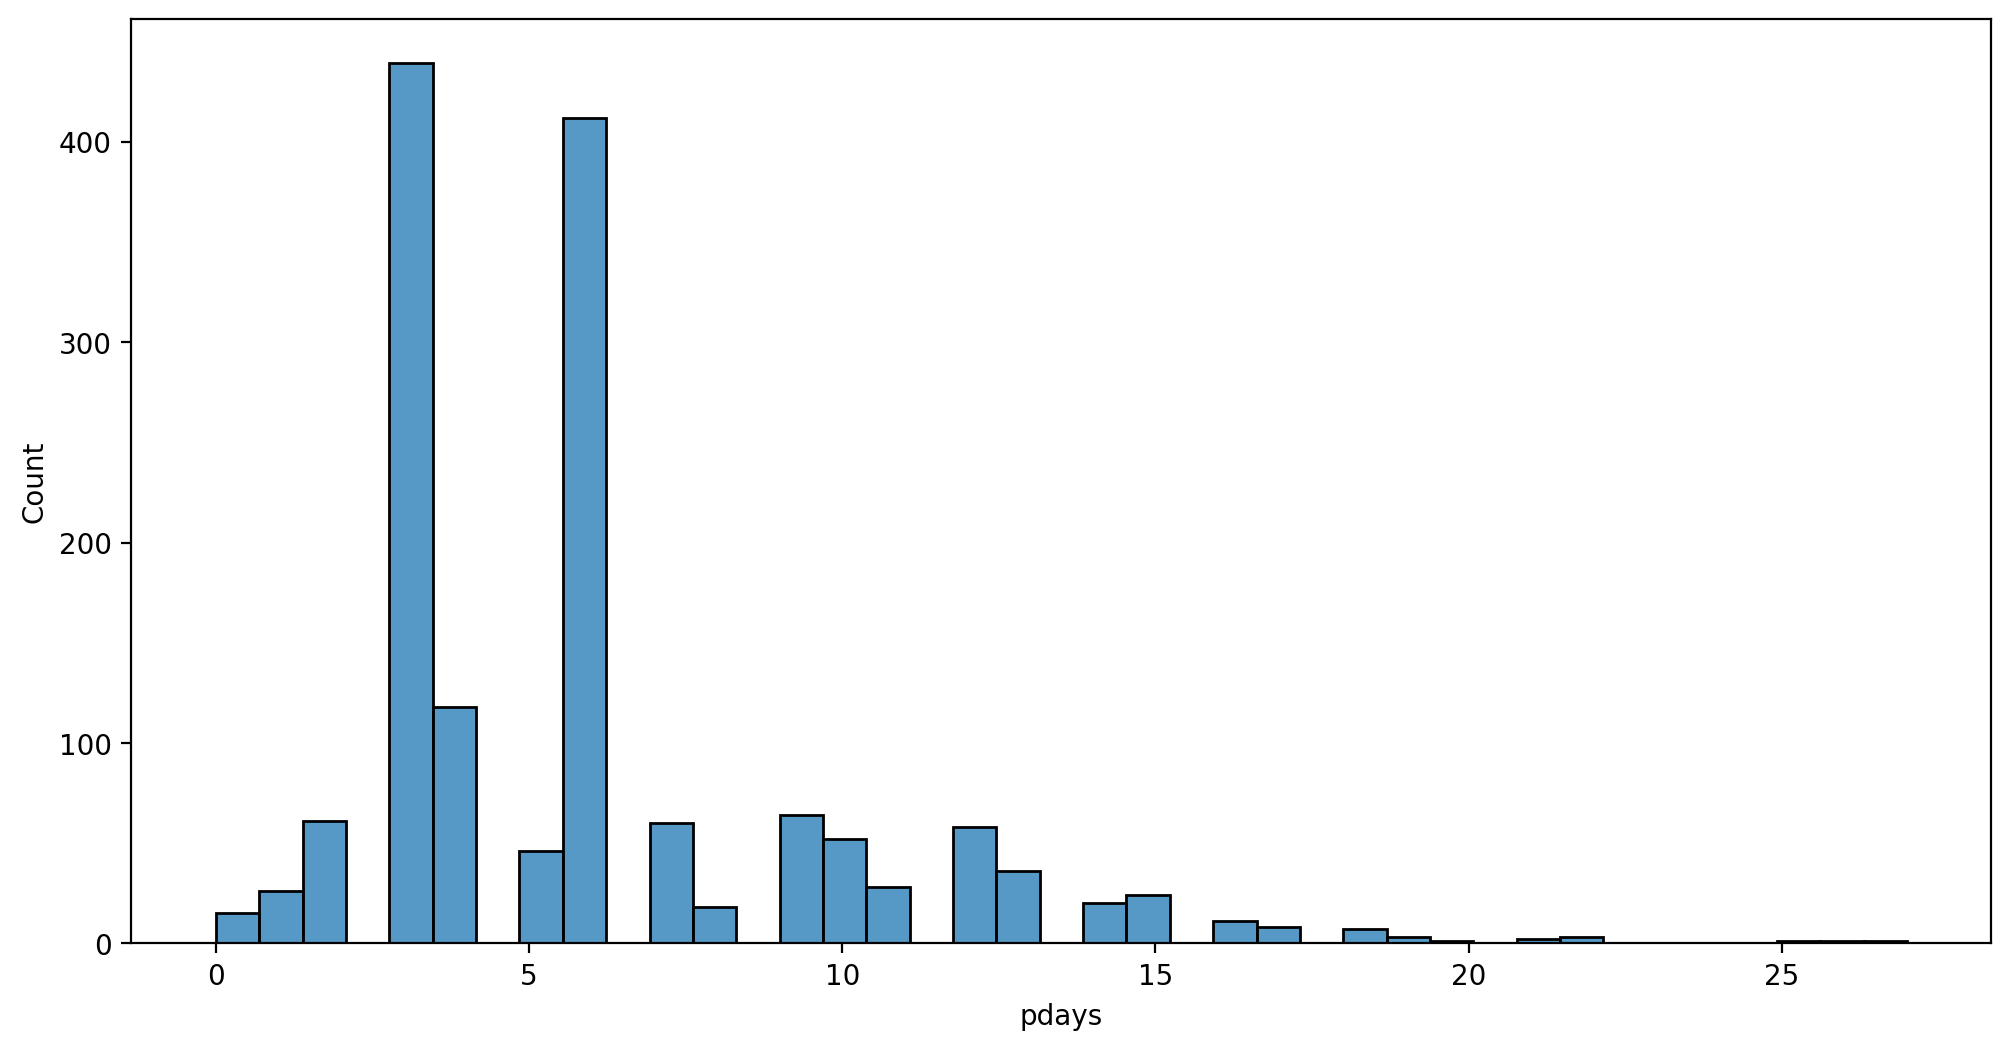

In [44]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays');

In [45]:
df['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [46]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

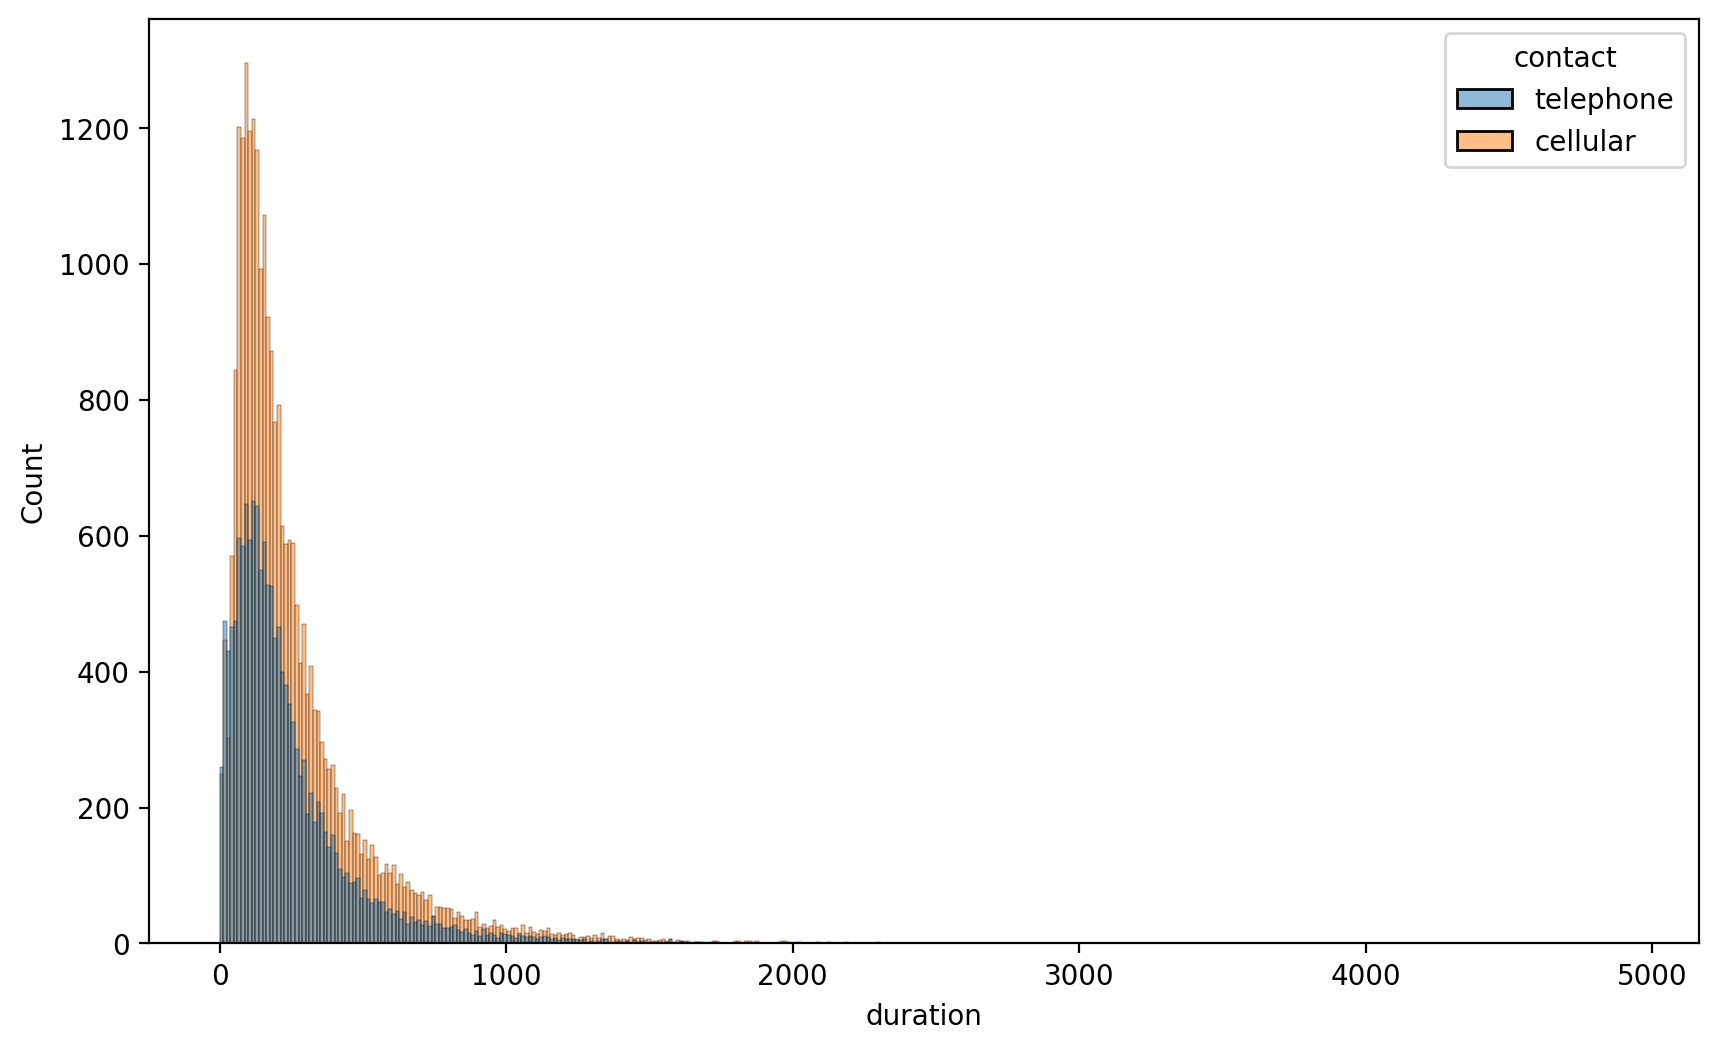

In [47]:
plt.figure(figsize=(10,6), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')

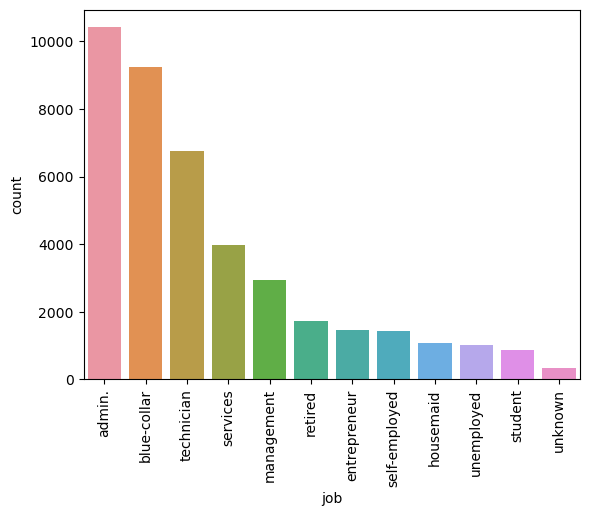

In [48]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

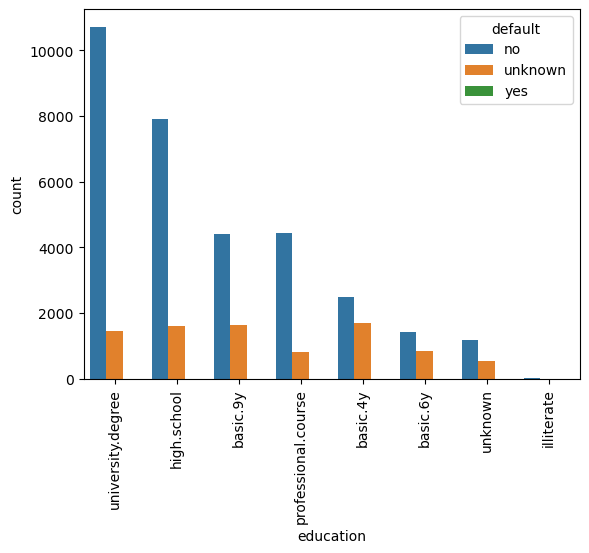

In [49]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

In [50]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

C:\Users\georg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


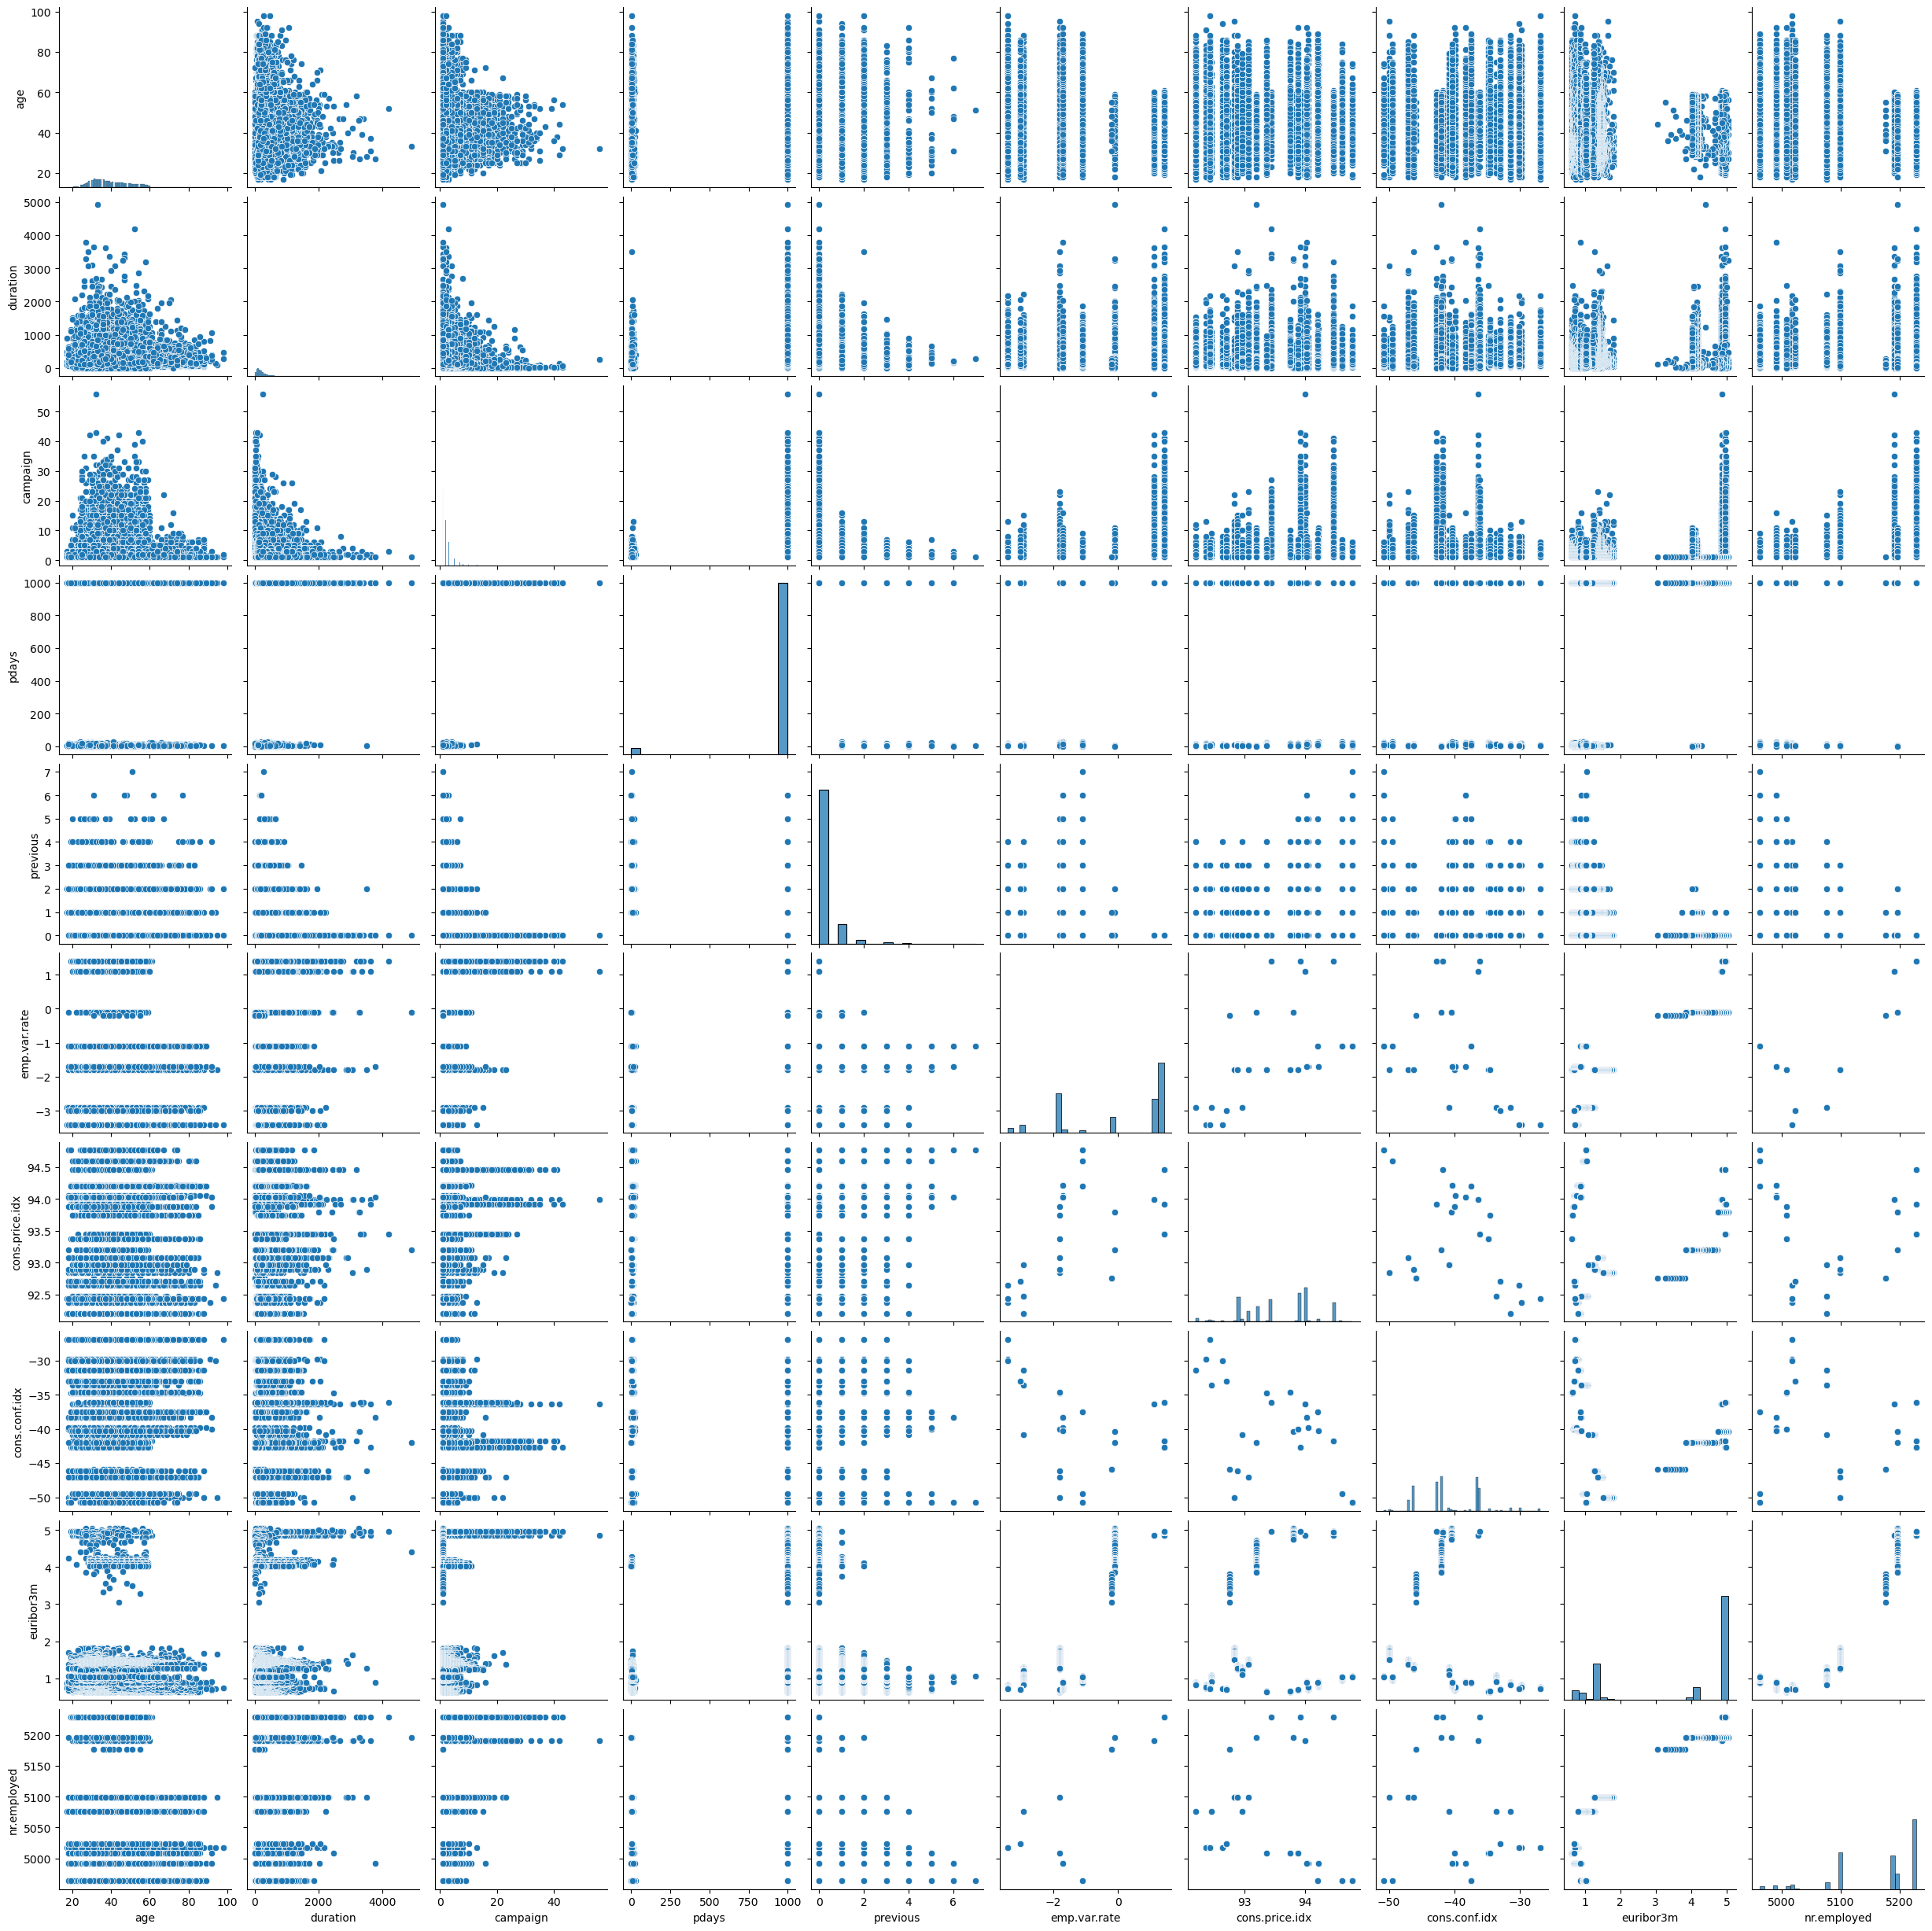

In [51]:
sns.pairplot(data=df)

<Axes: xlabel='age', ylabel='duration'>

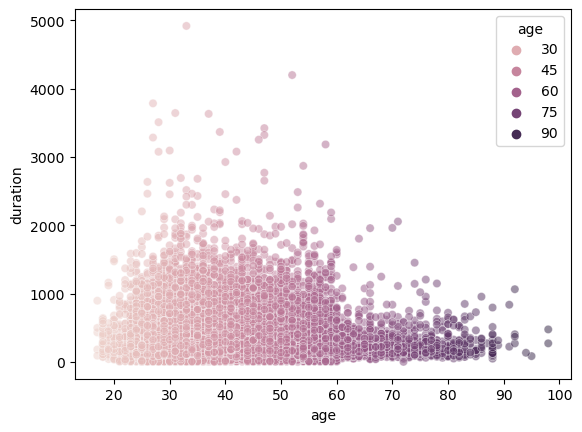

In [52]:
sns.scatterplot(data=df, x='age', y='duration', hue='age', alpha=0.5)

In [55]:
X = pd.get_dummies(df)

In [56]:
X.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_fri  \
0          -36.4      4.857       5191.0  ...            False   
1          -36.4      4.857       5191.0  ...            False   
2          -36.4      4.857       5191.0  ...            False   
3          -36.4      4.857       5191.0  ...            False   
4          -36.4      4.857       5191.0  ...            False   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0             True            False            False            False   
1             True            False            False            False   
2             True            False            False            False   
3             True            False            False            False   
4             True            False            False            False   

   poutcome_failure  poutcome_nonexistent  poutcome_success  subscribed_no  \
0             False                  True             False           True   
1             False                  True             False           True   
2             False                  True             False           True   
3             False                  True             False           True   
4             False                  True             False           True   

   subscribed_yes  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 65 columns]

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
scaled_X = scaler.fit_transform(X)

In [60]:
from sklearn.cluster import KMeans

In [61]:
#help(KMeans)

In [62]:
model = KMeans(n_clusters=2)

In [63]:
cluster_labels = model.fit_predict(scaled_X)

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [65]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [66]:
X['Cluster'] = cluster_labels

In [67]:
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  ...  day_of_week_mon  \
0              -36.4      4.857       5191.0  ...             True   
1              -36.4      4.857       5191.0  ...             True   
2              -36.4      4.857       5191.0  ...             True   
3              -36.4      4.857       5191.0  ...             True   
4              -36.4      4.857       5191.0  ...             True   
...              ...        ...          ...  ...              ...   
41183          -50.8      1.028       4963.6  ...            False   
41184          -50.8      1.028       4963.6  ...            False   
41185          -50.8      1.028       4963.6  ...            False   
41186          -50.8      1.028       4963.6  ...            False   
41187          -50.8      1.028       4963.6  ...            False   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                False            False            False             False   
1                False            False            False             False   
2                False            False            False             False   
3                False            False            False             False   
4                False            False            False             False   
...                ...              ...              ...               ...   
41183            False            False            False             False   
41184            False            False            False             False   
41185            False            False            False             False   
41186            False            False            False             False   
41187            False            False            False              True   

       poutcome_nonexistent  poutcome_success  subscribed_no  subscribed_yes  \
0                      True             False           True           False   
1                      True             False           True           False   
2                      True             False           True           False   
3                      True             False           True           False   
4                      True             False           True           False   
...                     ...               ...            ...             ...   
41183                  True             False          False            True   
41184                  True             False           True           False   
41185                  True             False           True           False   
41186                  True             False          False            True   
41187                 False             False           True           False   

       Cluster  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
41183        0  
41184        0  
41185        0  
41186        0  
41187        0  

[41188 rows x 66 columns]

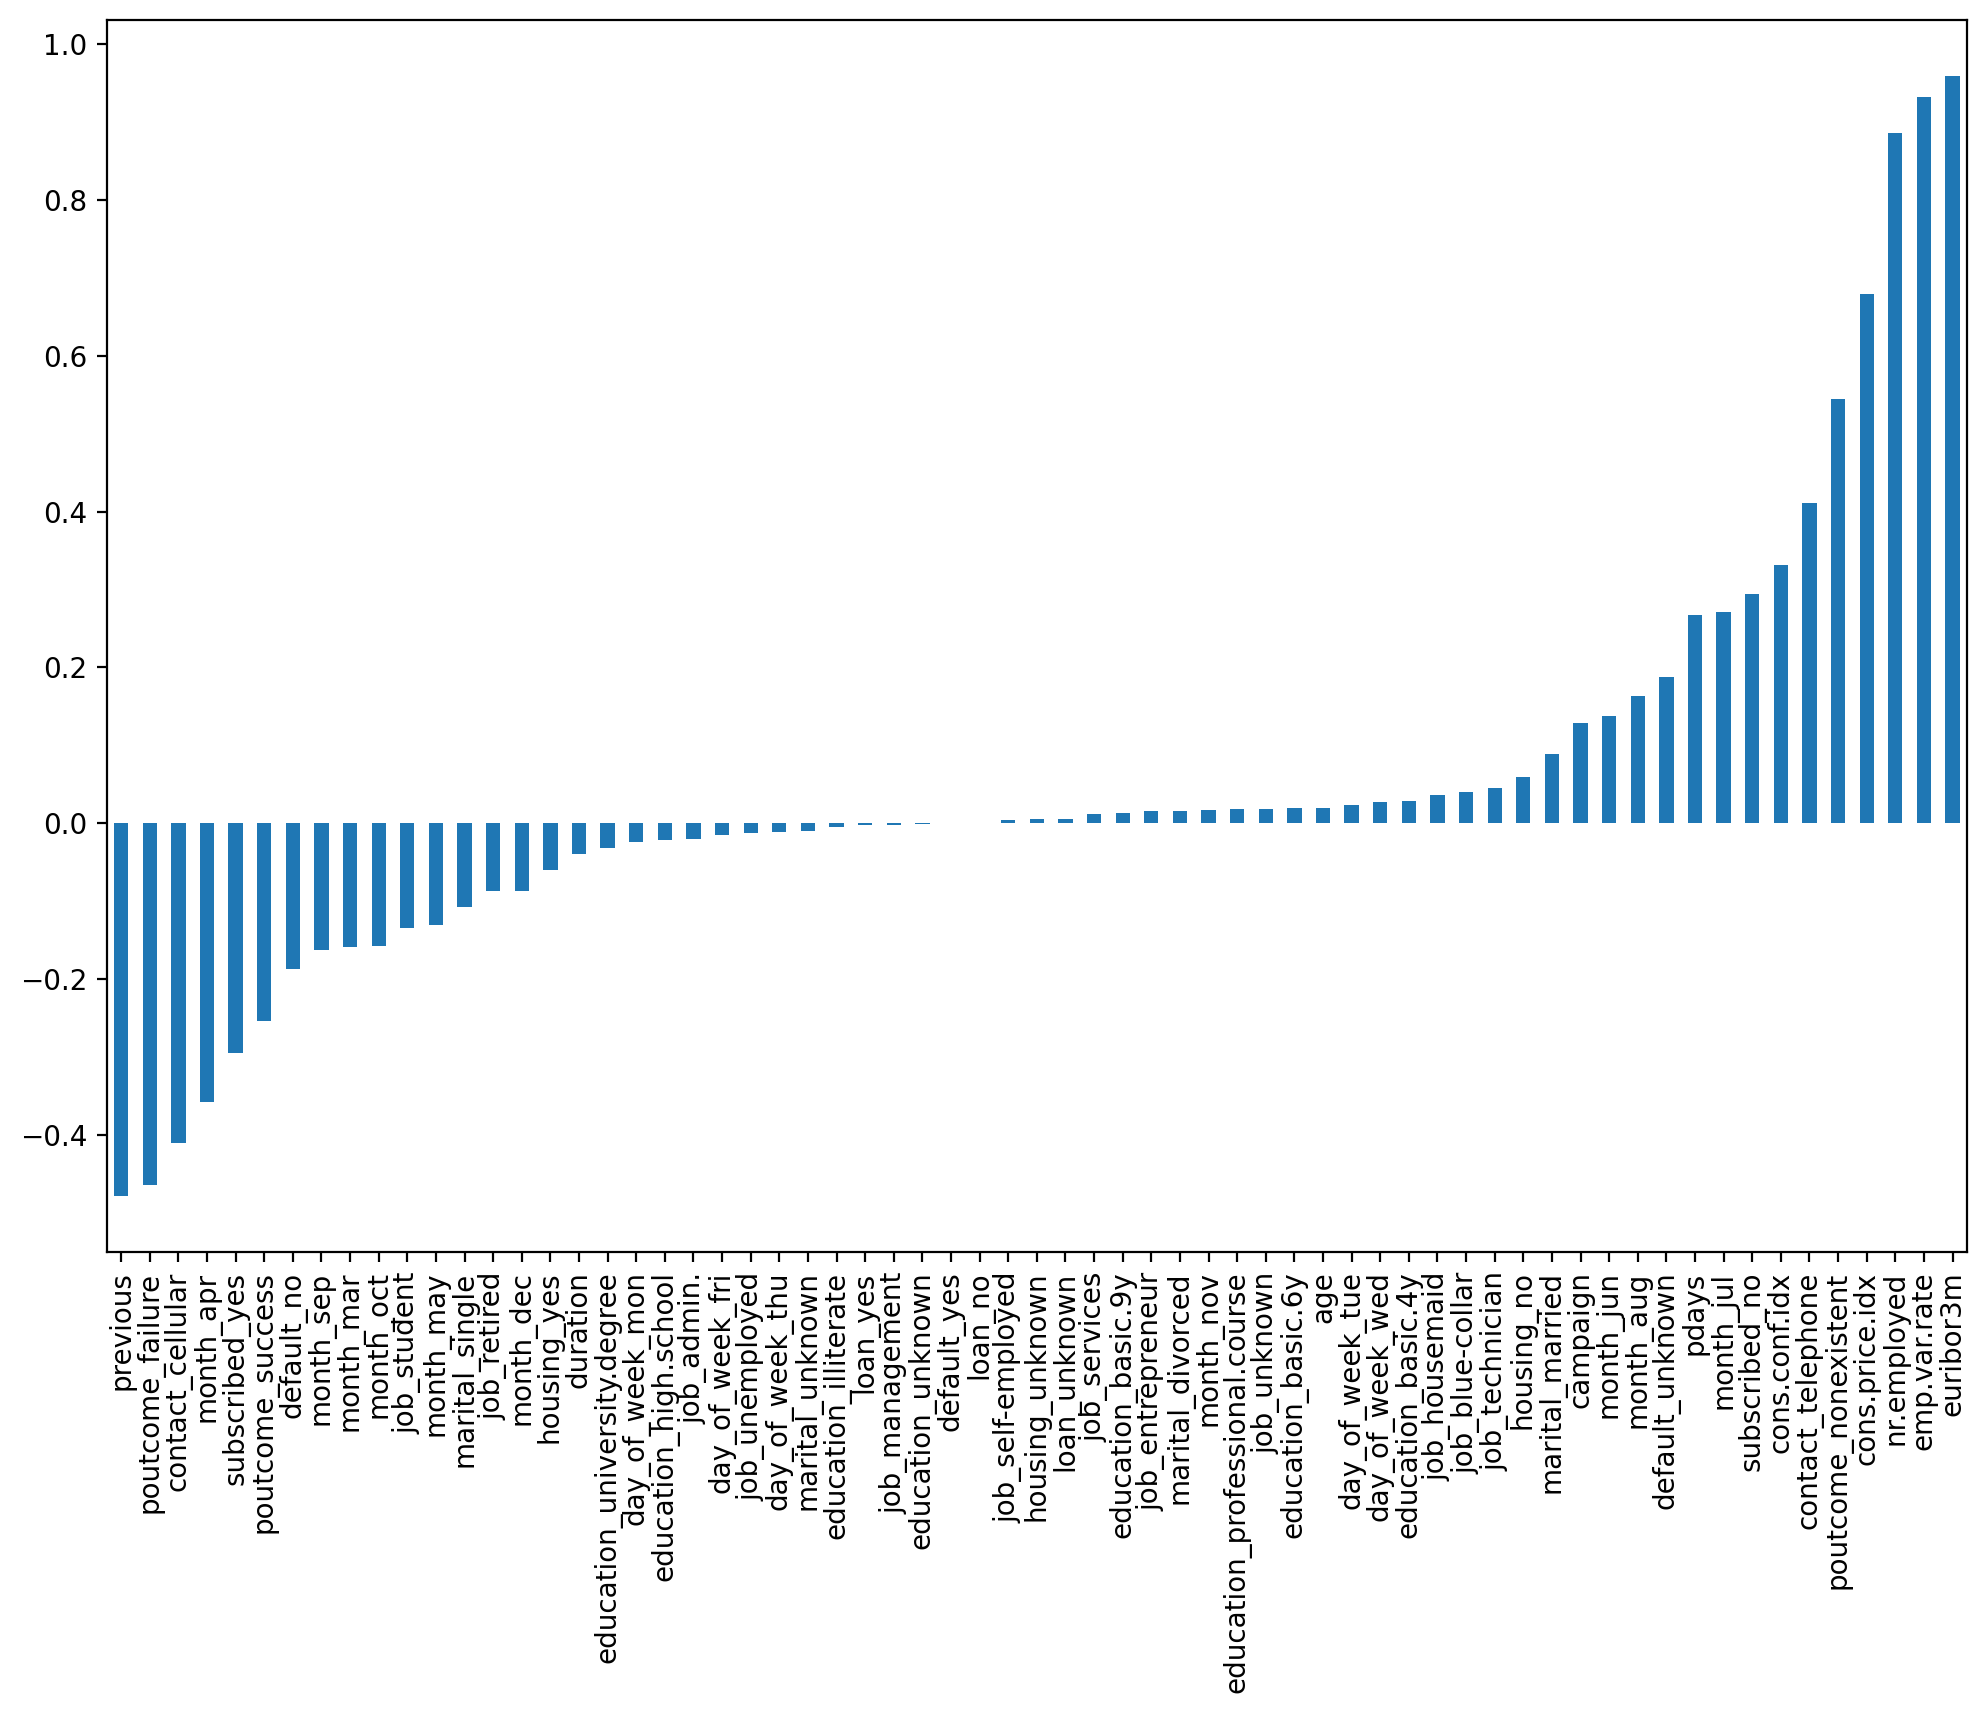

In [68]:
plt.figure(figsize=(12,8), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90);

In [30]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) #SSD point to cluster center

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [31]:
ssd

[2469792.3616627543,
 2370416.297425589,
 2271503.4998714784,
 2219379.799433156,
 2152684.7967854217,
 2100209.26821121,
 2058565.336158502,
 2023522.435306241]

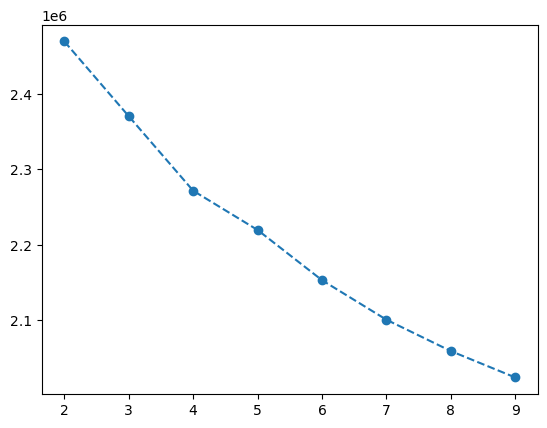

In [39]:
plt.plot(range(2,10), ssd, 'o--')

In [40]:
pd.Series(ssd)

0    2.469792e+06
1    2.370416e+06
2    2.271503e+06
3    2.219380e+06
4    2.152685e+06
5    2.100209e+06
6    2.058565e+06
7    2.023522e+06
dtype: float64

In [41]:
pd.Series(ssd).diff()

0             NaN
1   -99376.064237
2   -98912.797554
3   -52123.700438
4   -66695.002648
5   -52475.528574
6   -41643.932053
7   -35042.900852
dtype: float64

## Color Quantization

In [7]:
import matplotlib.image as mpimg #reads images as np array

In [8]:
img_array = mpimg.imread('C:/Users/georg/Machine Learning/DATA/palm_trees.jpg')

In [9]:
img_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [11]:
img_array.shape # H, W, C

(1401, 934, 3)

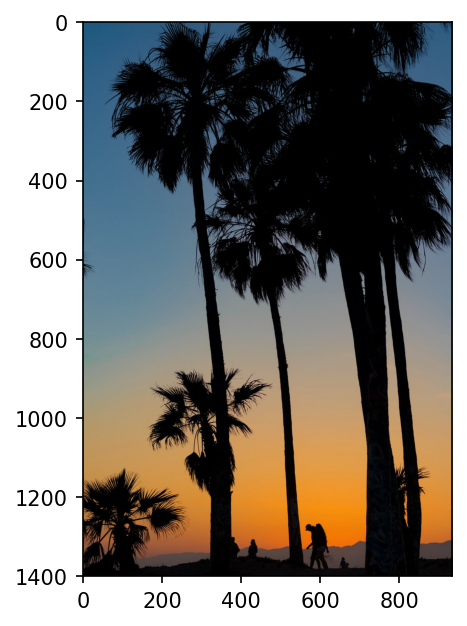

In [15]:
plt.figure(dpi=150)
plt.imshow(img_array);

In [16]:
(h,w,c) = img_array.shape

In [17]:
h

1401

In [18]:
img_2d_array = img_array.reshape(h*w, c)

In [19]:
img_2d_array

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [21]:
from sklearn.cluster import KMeans

In [22]:
model = KMeans(n_clusters=6)

In [23]:
labels = model.fit_predict(img_2d_array)

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [26]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [27]:
rgb_codes

array([[  3,   3,   4],
       [195, 155, 106],
       [ 72, 110, 138],
       [140, 145, 143],
       [219, 134,  44],
       [ 67,  62,  62]])

In [28]:
rgb_codes[labels]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [29]:
img_2d_array

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [30]:
quan_img = np.reshape(rgb_codes[labels], (h,w,c))

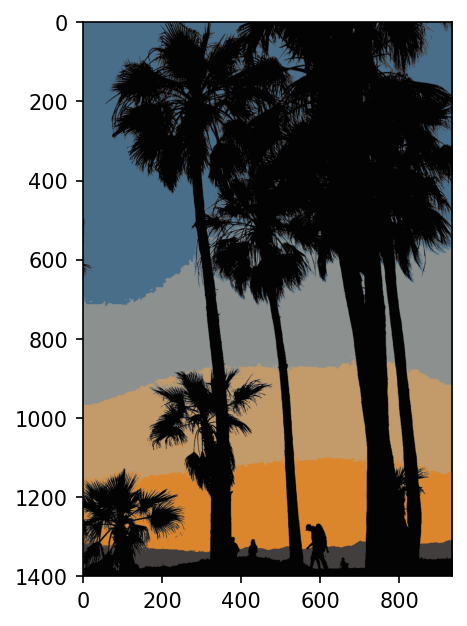

In [31]:
plt.figure(dpi=150)
plt.imshow(quan_img);

## Hierarchical Clustering

In [3]:
df = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cluster_mpg.csv')

In [4]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [6]:
df.describe().transpose()

count         mean         std     min       25%      50%  \
mpg           392.0    23.445918    7.805007     9.0    17.000    22.75   
cylinders     392.0     5.471939    1.705783     3.0     4.000     4.00   
displacement  392.0   194.411990  104.644004    68.0   105.000   151.00   
horsepower    392.0   104.469388   38.491160    46.0    75.000    93.50   
weight        392.0  2977.584184  849.402560  1613.0  2225.250  2803.50   
acceleration  392.0    15.541327    2.758864     8.0    13.775    15.50   
model_year    392.0    75.979592    3.683737    70.0    73.000    76.00   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   275.750   455.0  
horsepower     126.000   230.0  
weight        3614.750  5140.0  
acceleration    17.025    24.8  
model_year      79.000    82.0

In [7]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [8]:
df_dummies = pd.get_dummies(df.drop('name', axis=1))

In [9]:
df_dummies

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0        86.0    2790          15.6   
388  44.0          4          97.0        52.0    2130          24.6   
389  32.0          4         135.0        84.0    2295          11.6   
390  28.0          4         120.0        79.0    2625          18.6   
391  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin_europe  origin_japan  origin_usa  
0            70          False         False        True  
1            70          False         False        True  
2            70          False         False        True  
3            70          False         False        True  
4            70          False         False        True  
..          ...            ...           ...         ...  
387          82          False         False        True  
388          82           True         False       False  
389          82          False         False        True  
390          82          False         False        True  
391          82          False         False        True  

[392 rows x 10 columns]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(df_dummies)

In [13]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [14]:
scaled_df = pd.DataFrame(scaled_data, columns = df_dummies.columns)

In [15]:
scaled_df

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1    0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2    0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3    0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4    0.212766        1.0      0.604651    0.510870  0.520556      0.148810   
..        ...        ...           ...         ...       ...           ...   
387  0.478723        0.2      0.186047    0.217391  0.333711      0.452381   
388  0.930851        0.2      0.074935    0.032609  0.146583      0.988095   
389  0.611702        0.2      0.173127    0.206522  0.193365      0.214286   
390  0.505319        0.2      0.134367    0.179348  0.286929      0.630952   
391  0.585106        0.2      0.131783    0.195652  0.313864      0.678571   

     model_year  origin_europe  origin_japan  origin_usa  
0           0.0            0.0           0.0         1.0  
1           0.0            0.0           0.0         1.0  
2           0.0            0.0           0.0         1.0  
3           0.0            0.0           0.0         1.0  
4           0.0            0.0           0.0         1.0  
..          ...            ...           ...         ...  
387         1.0            0.0           0.0         1.0  
388         1.0            1.0           0.0         0.0  
389         1.0            0.0           0.0         1.0  
390         1.0            0.0           0.0         1.0  
391         1.0            0.0           0.0         1.0  

[392 rows x 10 columns]

<Axes: >

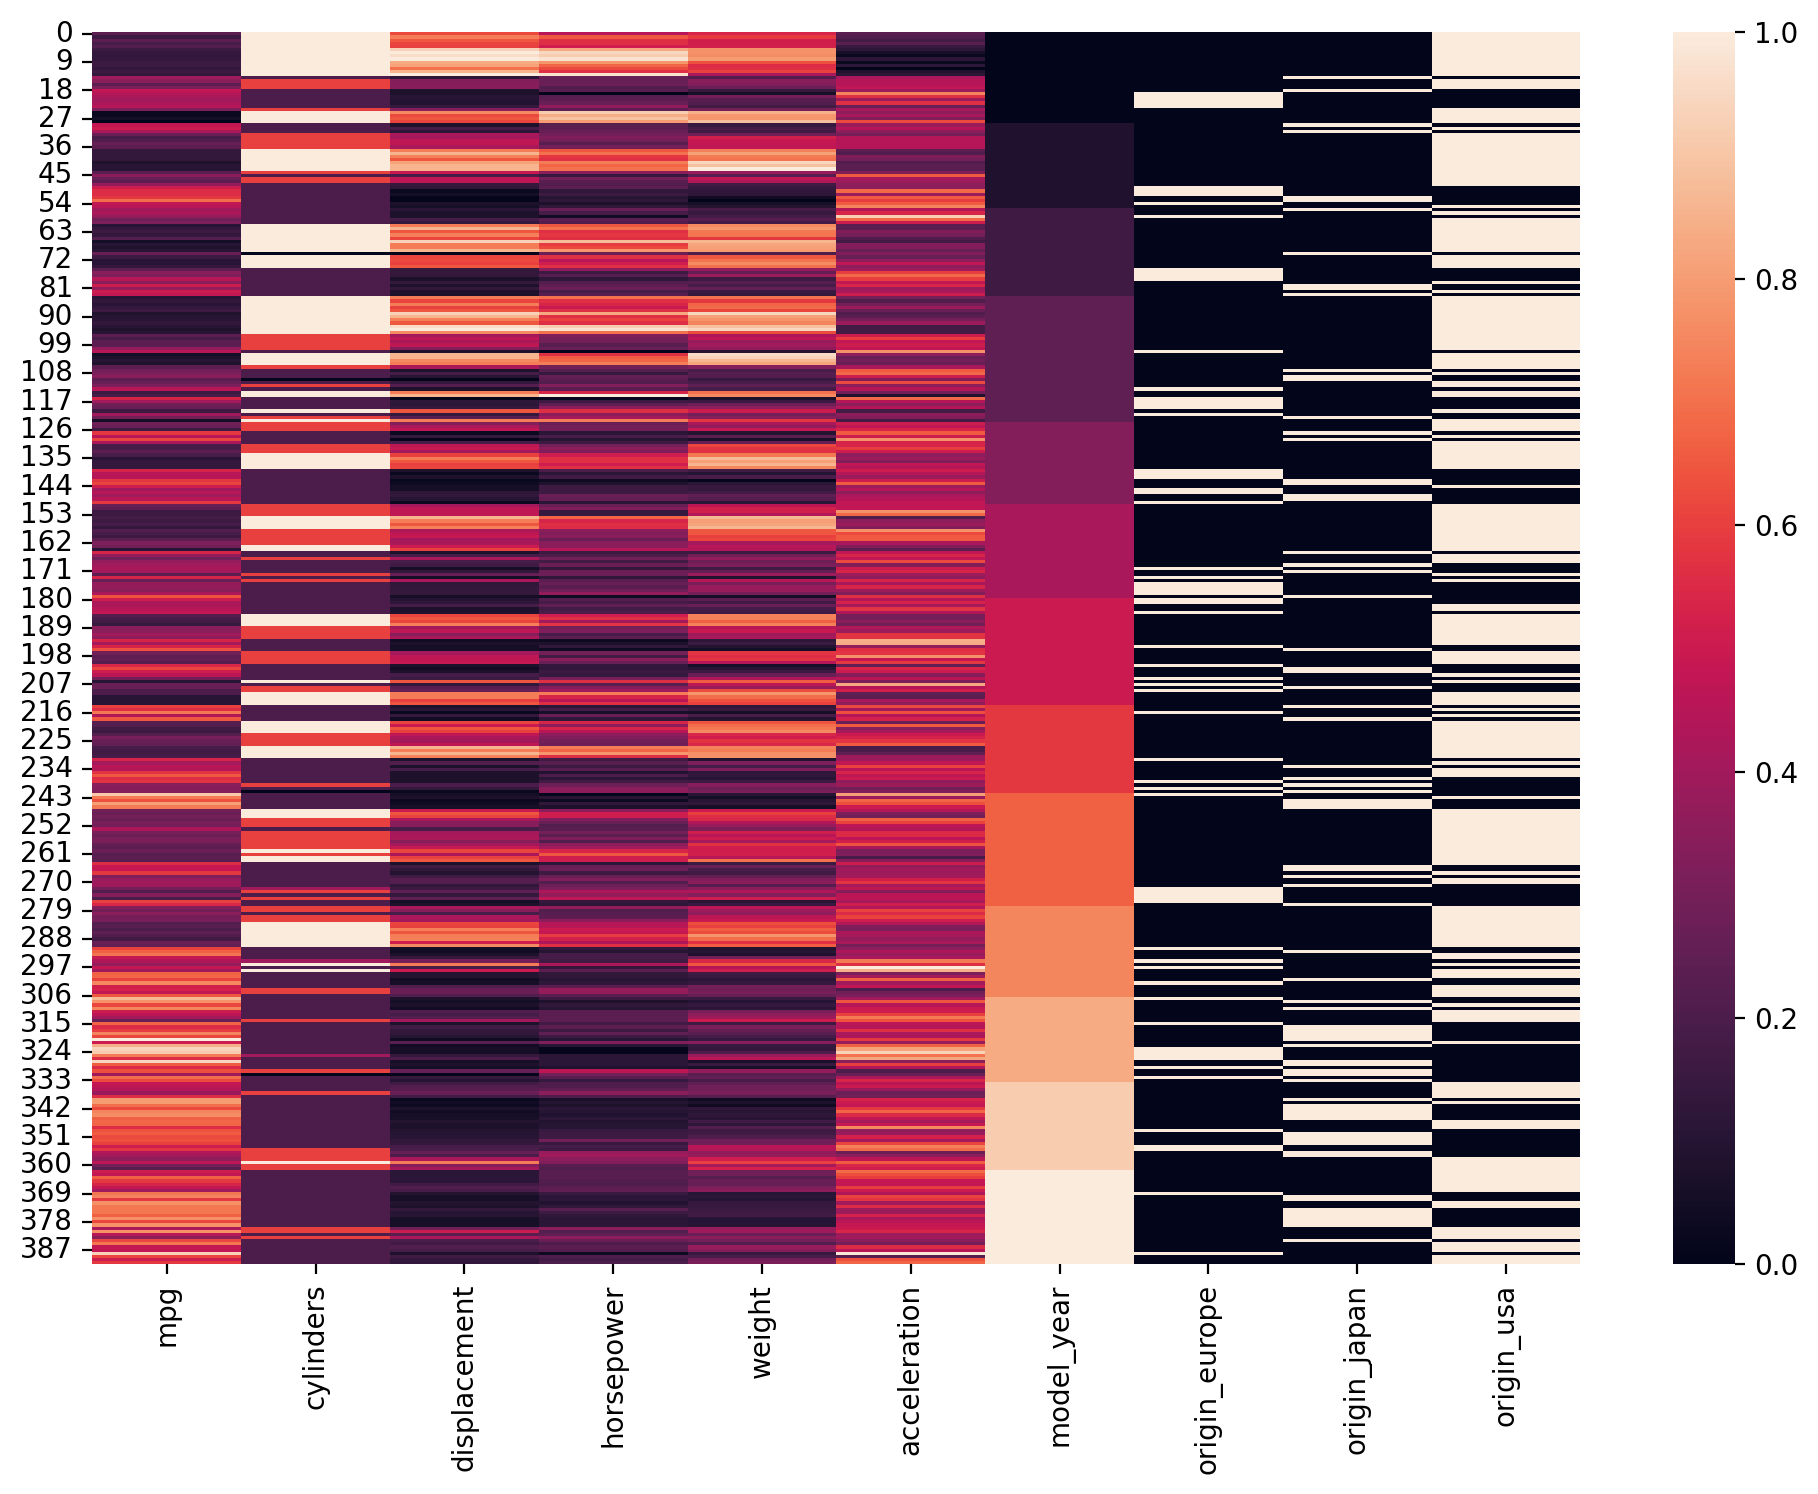

In [16]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data=scaled_df)

<Figure size 2400x1600 with 0 Axes>

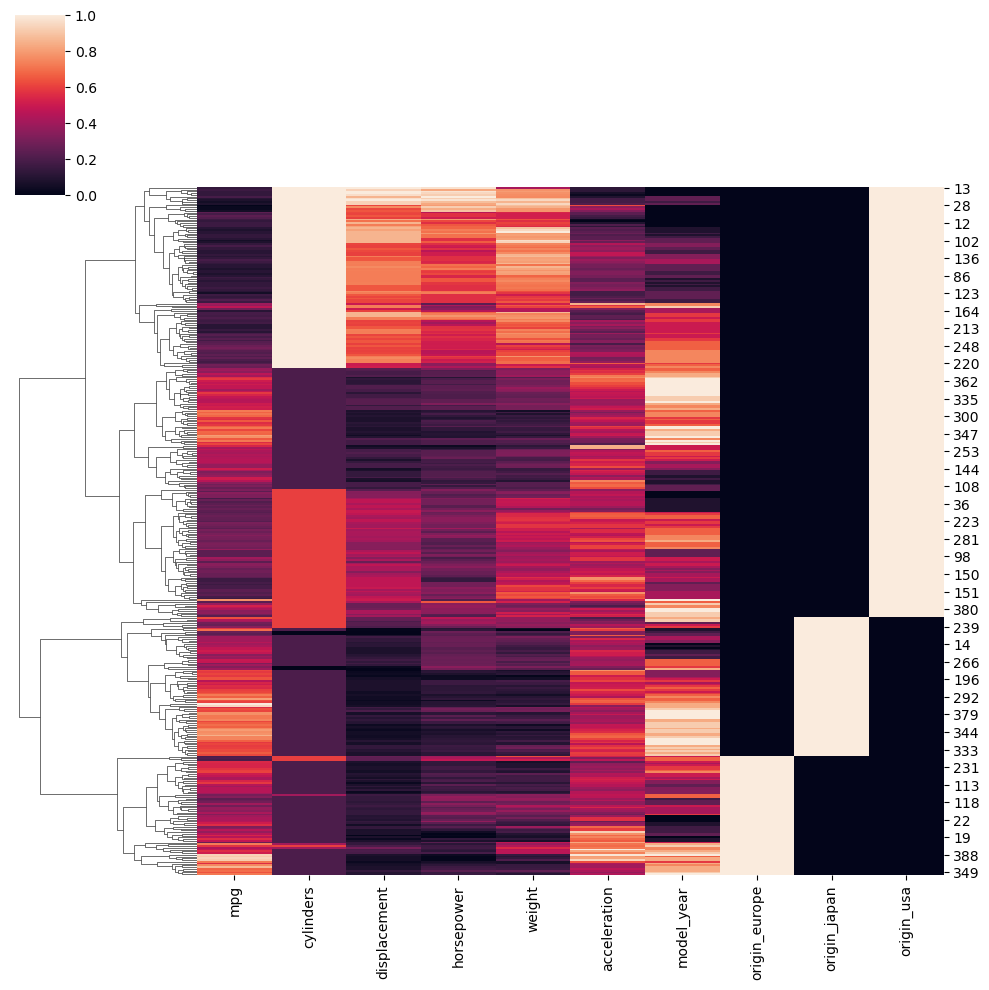

In [17]:
plt.figure(figsize=(12,8), dpi=200)
sns.clustermap(data=scaled_df, col_cluster=False);

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model = AgglomerativeClustering(n_clusters=4)

In [20]:
cluster_labels = model.fit_predict(scaled_df)

In [21]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

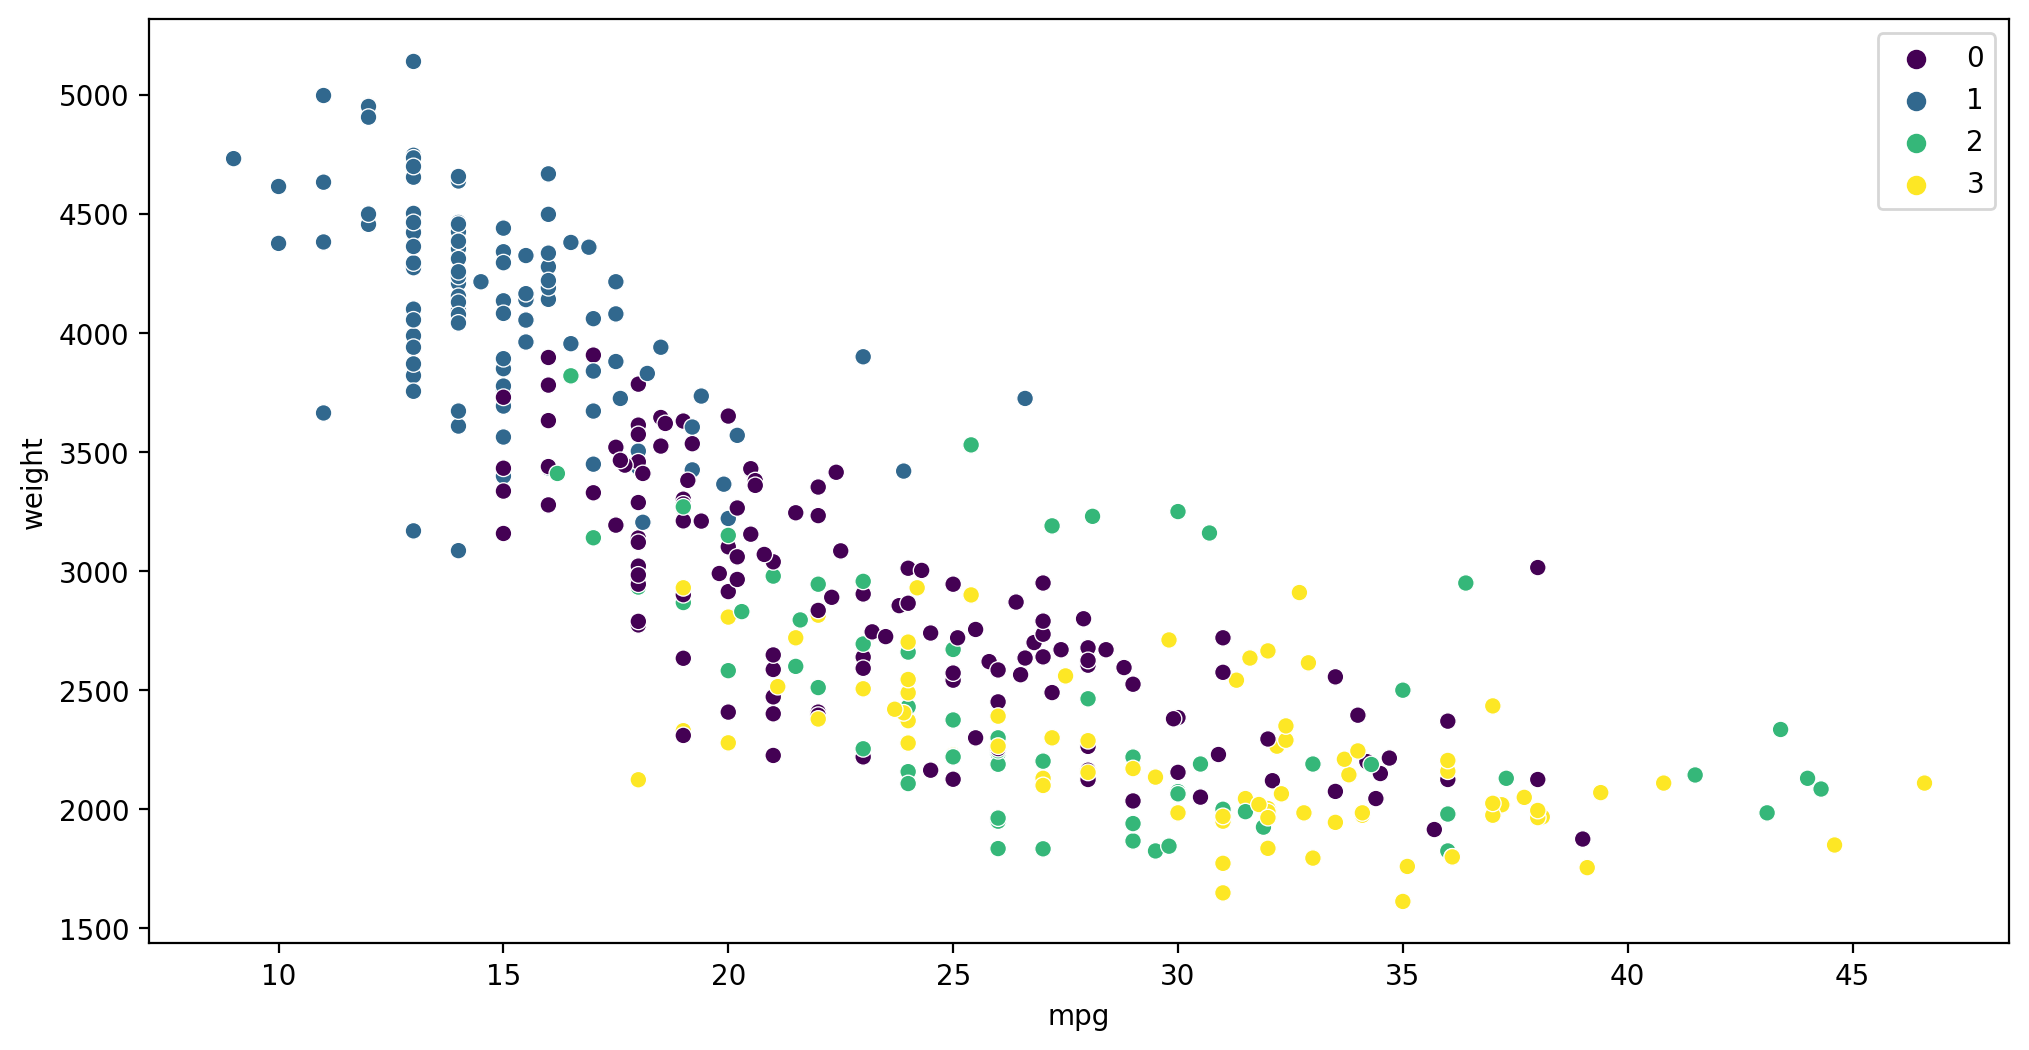

In [26]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df, x='mpg', y='weight', hue=cluster_labels,
               palette='viridis');

In [45]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [46]:
cluster_labels = model.fit_predict(scaled_df)

In [47]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [48]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [49]:
linkage_matrix = hierarchy.linkage(model.children_)

In [50]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

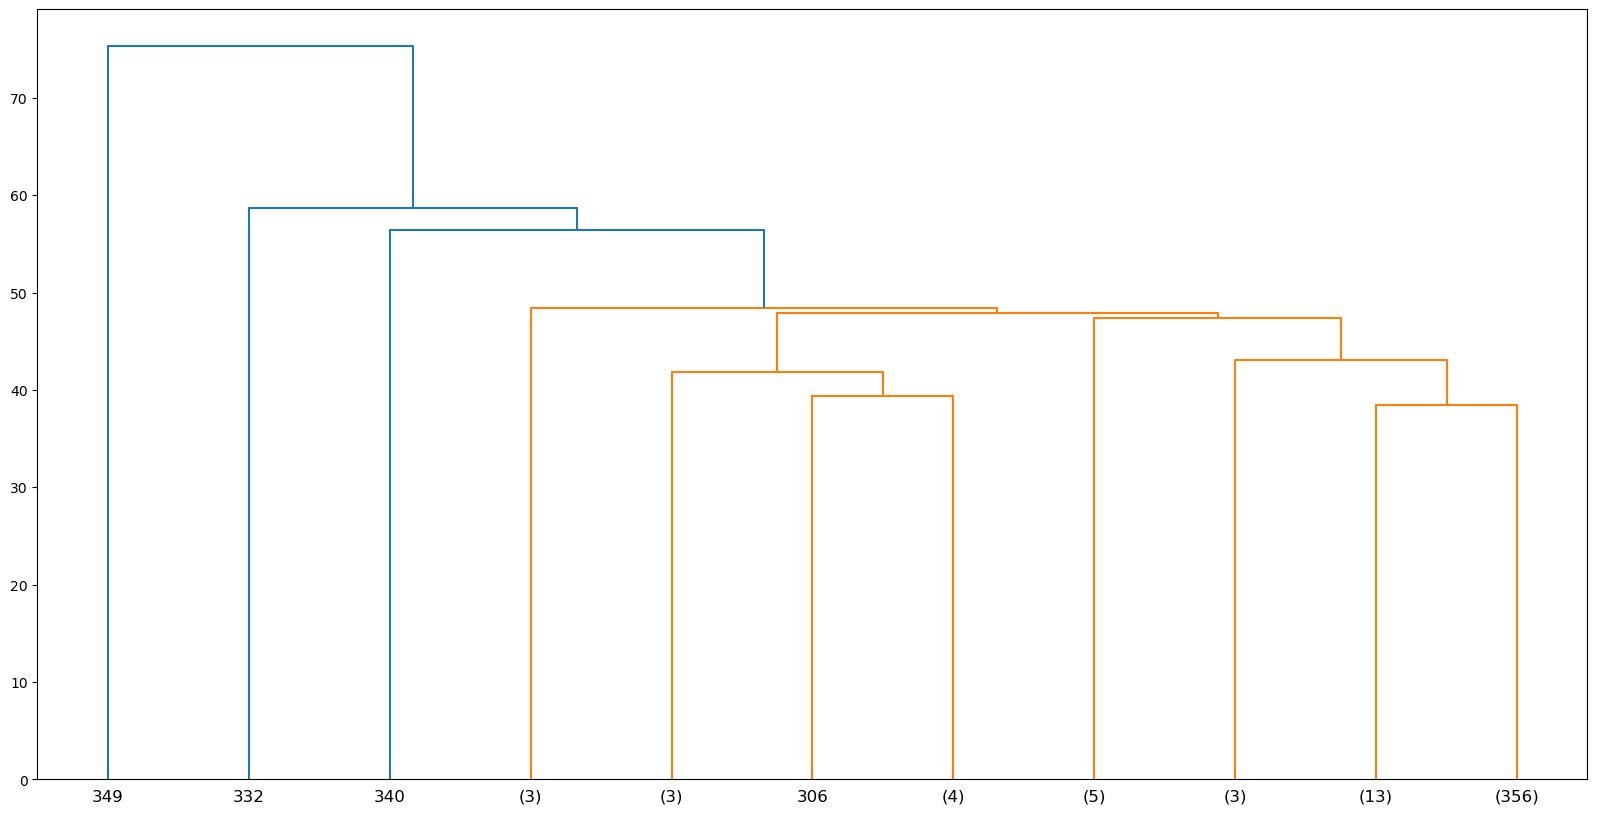

In [51]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=11)

In [37]:
#Max euclidean distance
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [40]:
scaled_df['mpg'].idxmax()

320

In [41]:
scaled_df['mpg'].idxmin()

28

In [42]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [43]:
distance = np.linalg.norm(car_a - car_b)

In [44]:
distance

2.3852929970374714

## DBSCAN

In [3]:
blobs = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cluster_blobs.csv')

In [4]:
blobs.head()

X1        X2
0  4.645333  6.822294
1  4.784032  6.422883
2 -5.851786  5.774331
3 -7.459592  6.456415
4  4.918911  6.961479

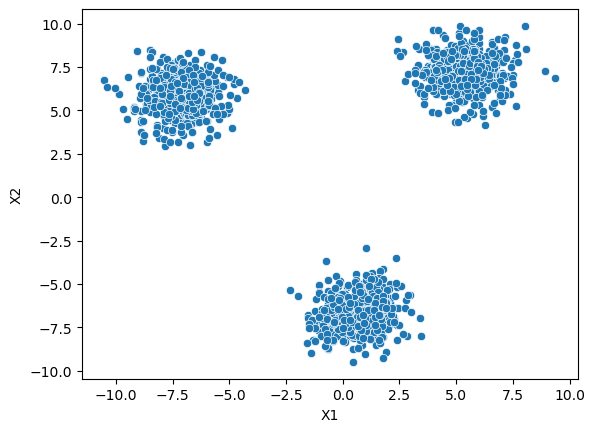

In [6]:
sns.scatterplot(data=blobs, x='X1', y='X2');

In [7]:
moons = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cluster_moons.csv')

In [8]:
moons.head()

X1        X2
0  0.674362 -0.444625
1  1.547129 -0.239796
2  1.601930 -0.230792
3  0.014563  0.449752
4  1.503476 -0.389164

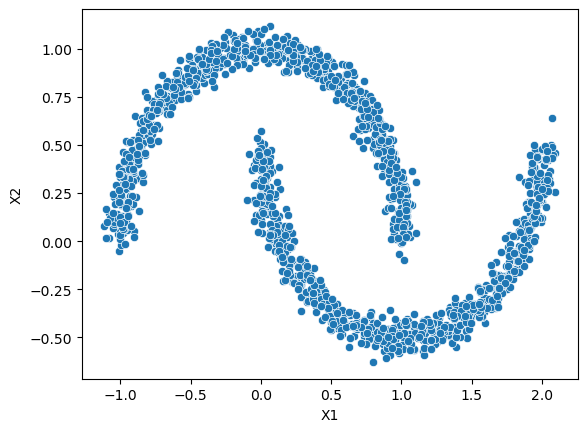

In [9]:
sns.scatterplot(data=moons, x='X1', y='X2');

In [10]:
circles = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cluster_circles.csv')

In [11]:
circles.head()

X1        X2
0 -0.348677  0.010157
1 -0.176587 -0.954283
2  0.301703 -0.113045
3 -0.782889 -0.719468
4 -0.733280 -0.757354

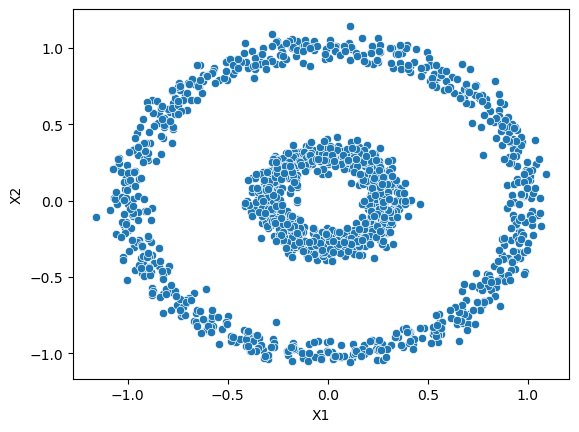

In [12]:
sns.scatterplot(data=circles, x='X1', y='X2');

In [17]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [18]:
from sklearn.cluster import KMeans

In [23]:
km_model = KMeans(n_clusters=2)

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\georg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


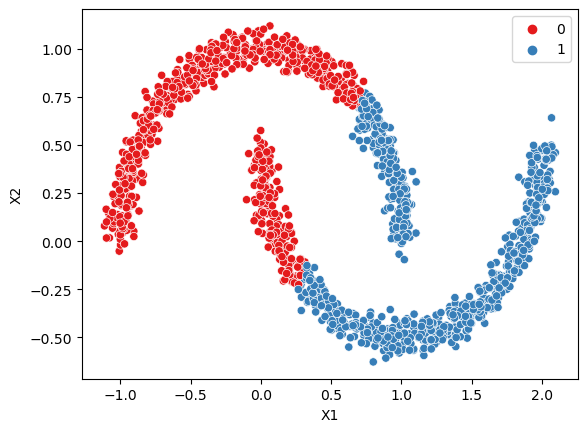

In [24]:
display_categories(km_model, moons)

In [21]:
from sklearn.cluster import DBSCAN

In [25]:
db_model = DBSCAN()

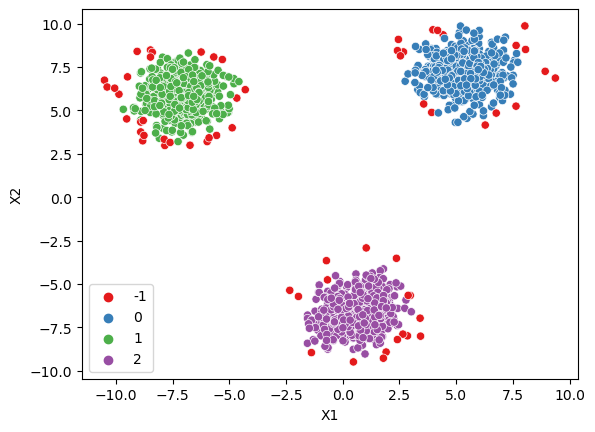

In [26]:
display_categories(db_model, blobs)

In [27]:
db_model2 = DBSCAN(eps=0.15)

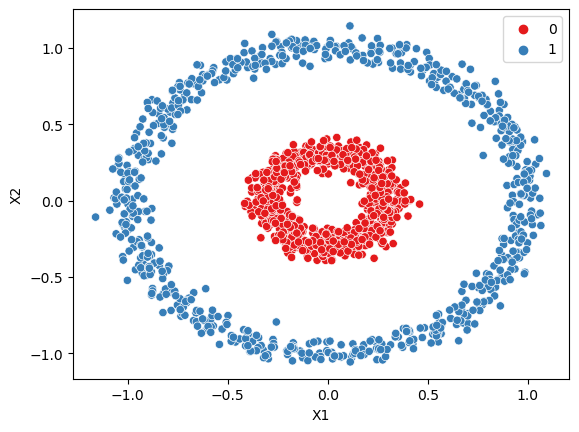

In [29]:
display_categories(db_model2, circles)

In [11]:
two_blobs = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cluster_two_blobs.csv')

In [12]:
two_blobs.head()

X1        X2
0  0.046733  1.765120
1 -8.994134 -6.508186
2  0.650539  1.264533
3 -9.501554 -6.736493
4  0.057050  0.188215

In [13]:
two_blobs_outliers = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

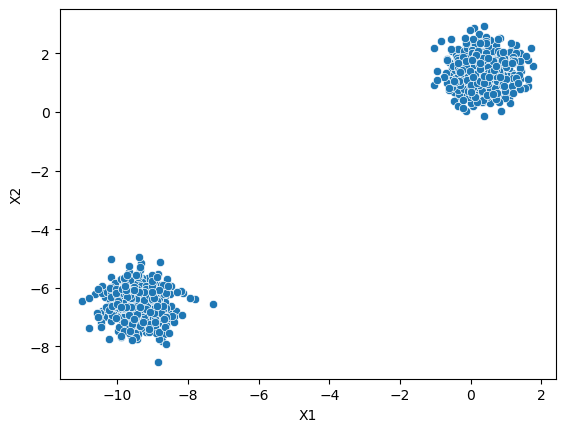

In [14]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

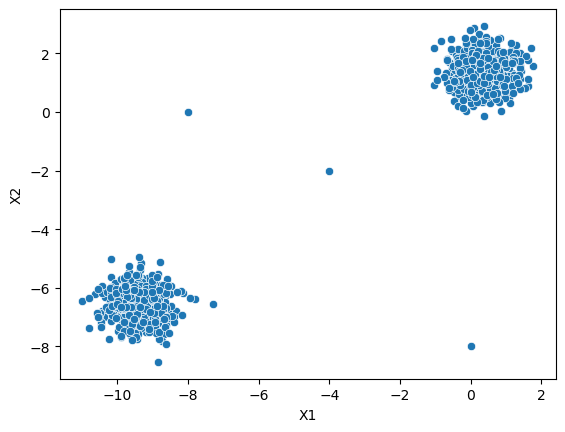

In [15]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [16]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN()

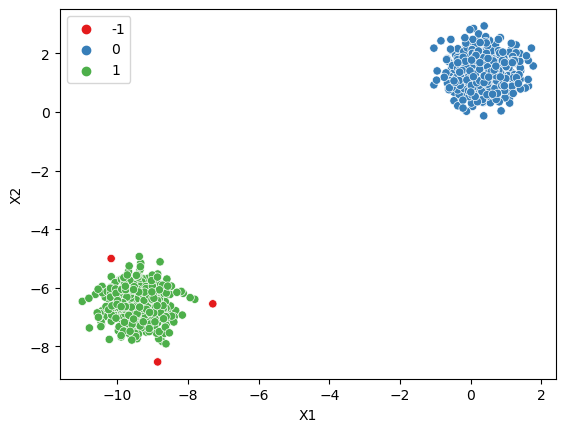

In [19]:
display_categories(dbscan, two_blobs)

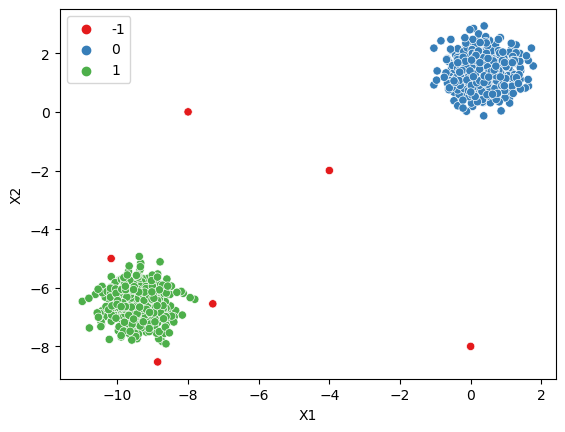

In [20]:
display_categories(dbscan, two_blobs_outliers)

In [43]:
dbscan = DBSCAN(eps=0.75)

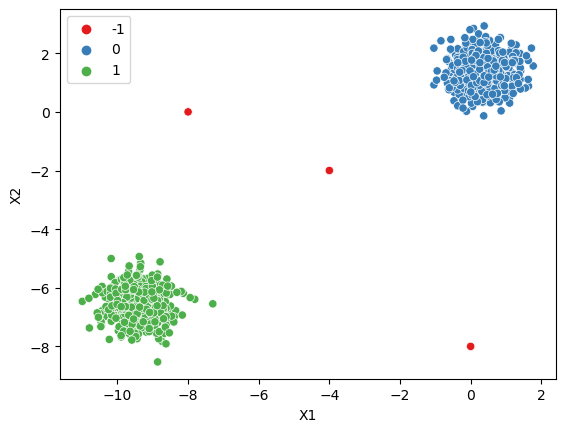

In [44]:
display_categories(dbscan, two_blobs_outliers)

In [29]:
np.sum(dbscan.labels_ == -1) # Number of outliers

3

In [34]:
outliers_percent = []
outliers_number = []

for eps in np.linspace(0.001, 7, 200):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    outliers_number.append(np.sum(dbscan.labels_ == -1))
    outliers_percent.append(100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

<Axes: >

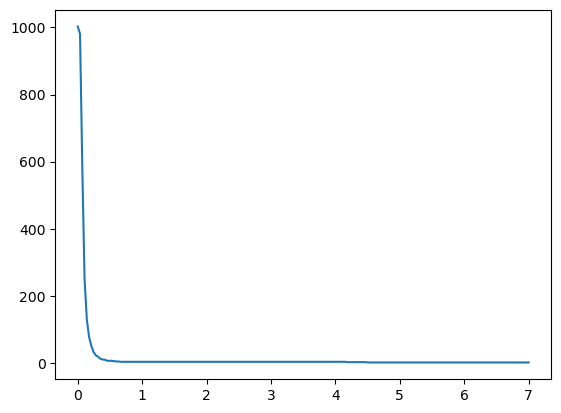

In [45]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outliers_number)

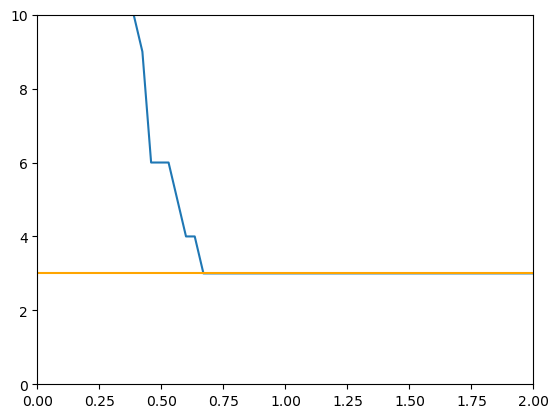

In [40]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outliers_number)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=2, color='orange')

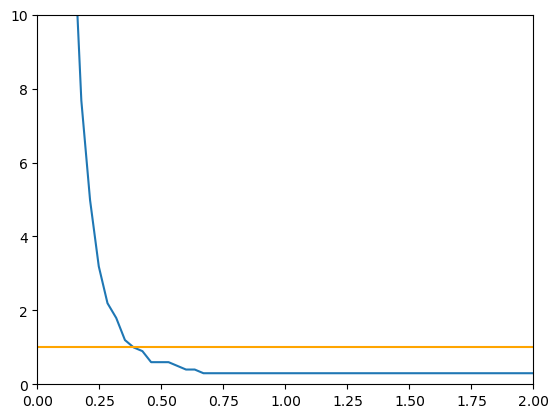

In [42]:
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outliers_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=1, xmin=0, xmax=2, color='orange')

In [47]:
#Now for min num of points
outliers_percent = []
outliers_number = []

for n in np.arange(1,100):
    
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    outliers_number.append(np.sum(dbscan.labels_ == -1))
    outliers_percent.append(100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

Text(0, 0.5, 'Pct. of points calssified as outliers')

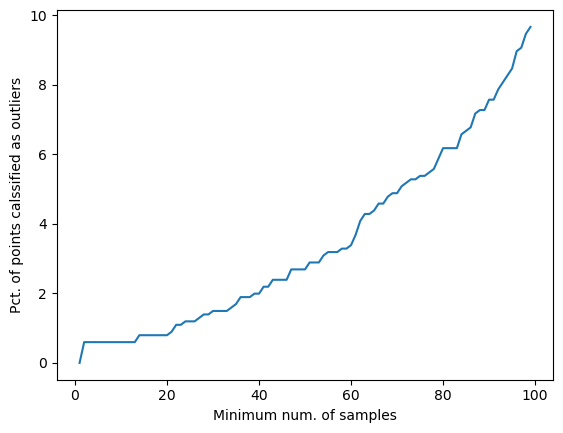

In [49]:
sns.lineplot(x=np.arange(1,100), y=outliers_percent)
plt.xlabel('Minimum num. of samples')
plt.ylabel('Pct. of points calssified as outliers')

In [50]:
# a good starting point for min. number of samples is twice the ammount of the dimensions

## Principal Component Analysis (PCA)

In [3]:
df = pd.read_csv('C:/Users/georg/Machine Learning/DATA/cancer_tumor_data_features.csv')

In [4]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaled_X = scaler.fit_transform(df)

In [8]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
scaled_X.mean()

-6.826538293184326e-17

In [11]:
cov_matrix = np.cov(scaled_X, rowvar=False)

In [12]:
cov_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [13]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [14]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [15]:
eigen_vectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [16]:
num_components = 2

In [23]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [24]:
sorted_key

array([0, 1], dtype=int64)

In [25]:
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [26]:
principal_component = np.dot(scaled_X, eigen_vectors)

In [27]:
principal_component

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

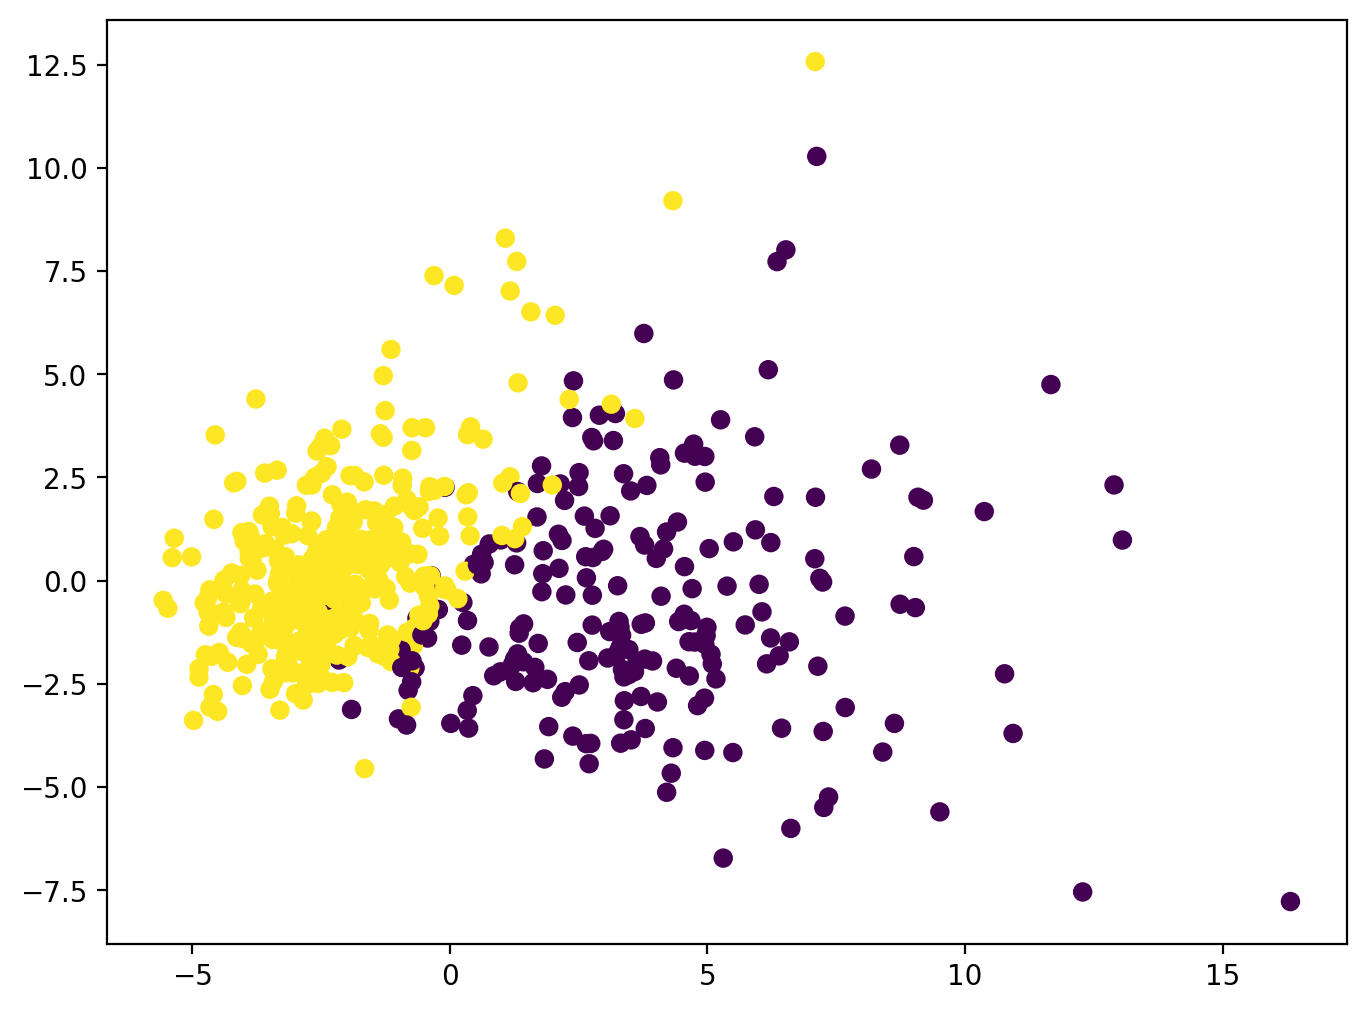

In [37]:
plt.figure(figsize=(8,6), dpi=200)
plt.scatter(principal_component[:,0], principal_component[:,1], c=cancer_dict['target'])

In [17]:
from sklearn.datasets import load_breast_cancer

In [18]:
cancer_dict = load_breast_cancer()

In [33]:
cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
print(cancer_dict['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
# Now using scikit

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X = scaler.fit_transform(df)

In [9]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [10]:
from sklearn.decomposition import PCA

In [11]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 

In [12]:
pca_model = PCA(n_components=2)

In [13]:
pca_model.fit(scaled_X)

PCA(n_components=2)

In [14]:
pca_model.transform(scaled_X)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [15]:
pc_results = pca_model.fit_transform(scaled_X)

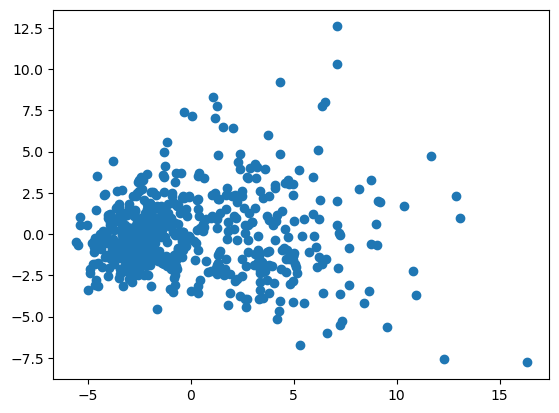

In [16]:
plt.scatter(pc_results[:,0], pc_results[:,1])

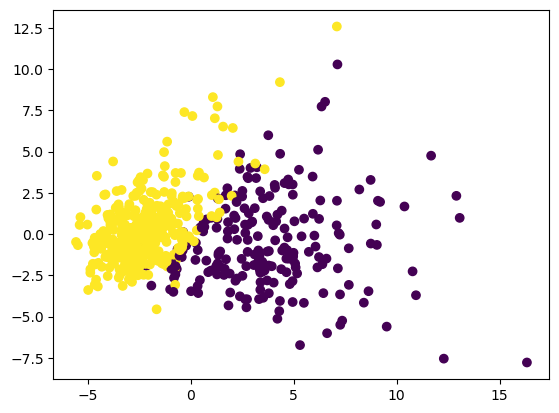

In [19]:
plt.scatter(pc_results[:,0], pc_results[:,1], c=cancer_dict['target'])

In [20]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [21]:
df_components = pd.DataFrame(pca_model.components_, index=['PC1','PC2'], columns=df.columns)

In [22]:
df_components

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   

     worst concavity  worst concave points  worst symmetry  \
PC1         0.228768              0.250886        0.122905   
PC2         0.097964             -0.008257        0.141883   

     worst fractal dimension  
PC1                 0.131784  
PC2                 0.275339  

[2 rows x 30 columns]

<Axes: >

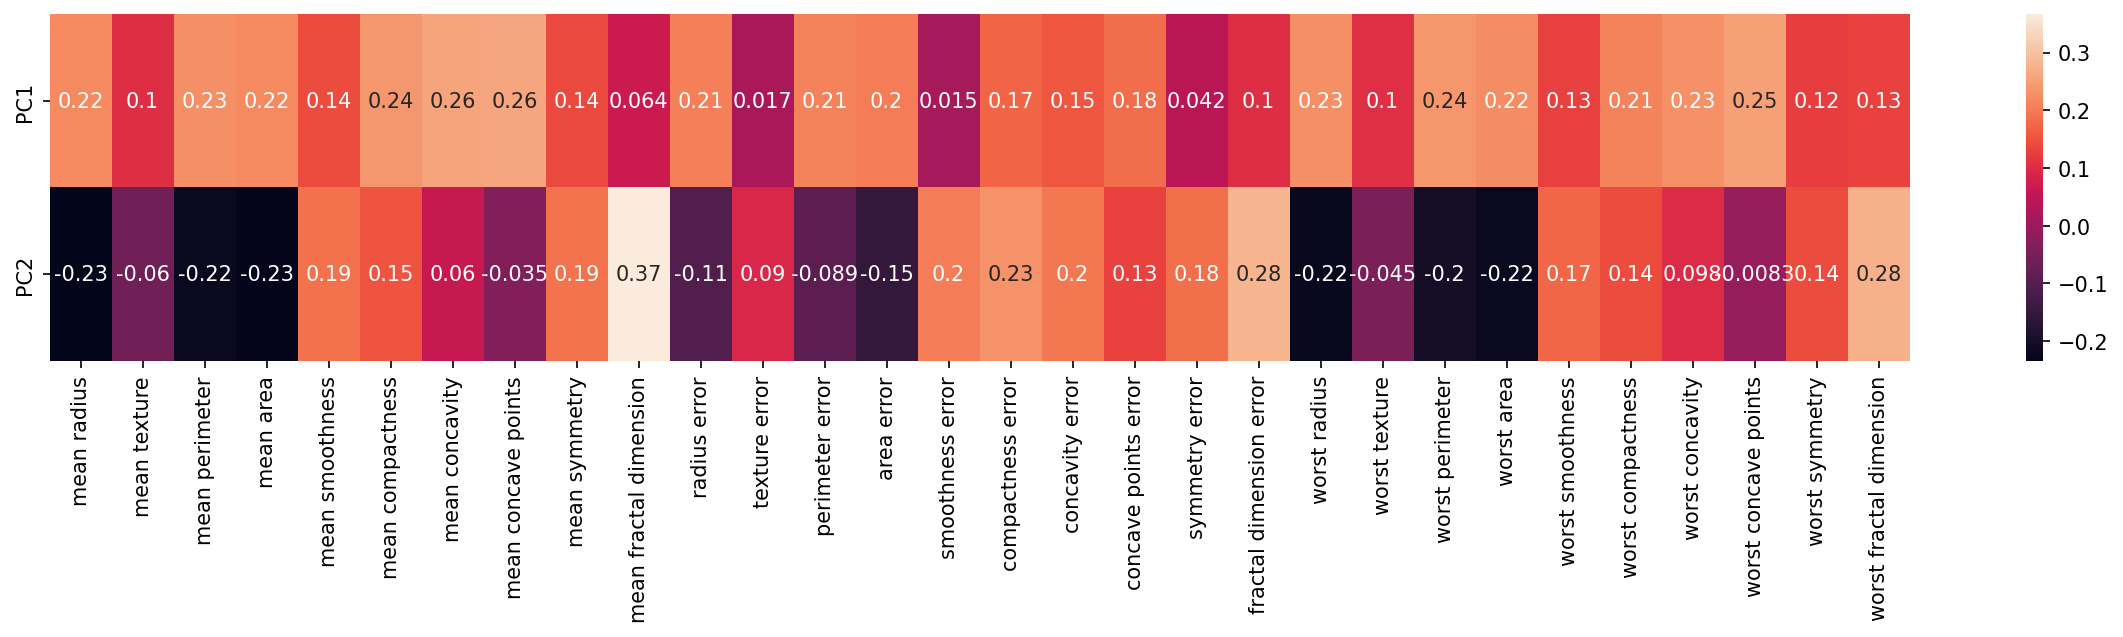

In [26]:
plt.figure(figsize=(20,3), dpi=150)
sns.heatmap(df_components, annot=True)

In [27]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [28]:
# Testing the variance explained for different amount of principal compomemts

In [30]:
explained_variance = []

for i in range(1,30):
    pca = PCA(n_components=i)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

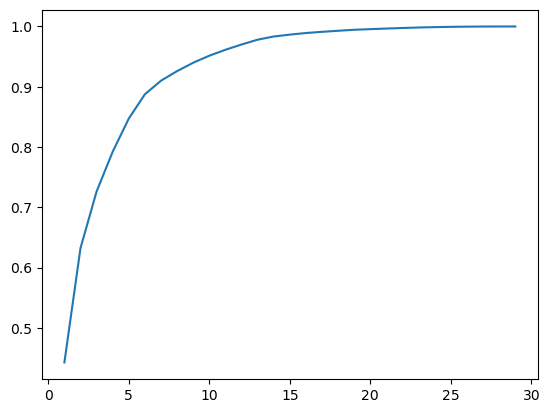

In [31]:
plt.plot(range(1,30), explained_variance)

# Model Deployment and Persistence

In [3]:
df = pd.read_csv('C:/Users/georg/Machine Learning/DATA/Advertising.csv')

In [4]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [5]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('sales', axis=1)

In [8]:
y = df['sales']

In [9]:
#Train / Validattion / Hold Out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
X_validation, X_houldout_test, y_validation, y_houldout_test = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [11]:
len(X)

200

In [12]:
len(X_train)

140

In [14]:
len(X_validation)

30

In [15]:
len(X_houldout_test)

30

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model = RandomForestRegressor(n_estimators=30, random_state=101)

In [27]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=101)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
valid_pred = model.predict(X_validation)

In [30]:
valid_pred

array([14.40333333,  5.47333333,  4.14      , 15.72666667, 11.66666667,
        9.93      , 10.83333333, 11.48      , 18.02      ,  7.60333333,
       10.9       , 21.44333333, 14.08333333,  7.53333333, 11.81333333,
        6.83      , 13.51      , 13.62      , 11.01333333,  7.99666667,
       12.53333333, 21.63      , 19.49      , 15.73      , 16.05666667,
       24.21666667, 20.17666667,  9.50666667, 14.50333333, 19.36333333])

In [31]:
MAE = mean_absolute_error(y_validation, valid_pred)

In [32]:
MAE

0.6575555555555552

In [33]:
np.sqrt(mean_squared_error(y_validation, valid_pred))

0.8542009478215644

In [35]:
# Now we're satisfiedd with the performance
# Now for the final performance metrics

In [36]:
holdout_preds = model.predict(X_houldout_test)

In [37]:
MAE = mean_absolute_error(y_houldout_test, holdout_preds)

In [38]:
MAE

0.5937777777777775

In [39]:
np.sqrt(mean_squared_error(y_houldout_test, holdout_preds))

0.745323693040418

In [40]:
final_model = RandomForestRegressor(n_estimators=30, random_state=101)

In [41]:
final_model.fit(X,y)

RandomForestRegressor(n_estimators=30, random_state=101)

In [47]:
#saving the model
import joblib

In [43]:
joblib.dump(final_model, 'my_final_model.pkl')

['my_final_model.pkl']

In [44]:
list(X.columns)

['TV', 'radio', 'newspaper']

In [45]:
joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']

In [46]:
#Now loading the model

In [48]:
new_cols = joblib.load('col_names.pkl')

In [49]:
new_cols

['TV', 'radio', 'newspaper']

In [50]:
loaded_model = joblib.load('my_final_model.pkl')

In [51]:
loaded_model

RandomForestRegressor(n_estimators=30, random_state=101)

In [52]:
loaded_model.predict([[230.1, 37.8, 69.2]])

C:\Users\georg\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21.99])